### 건물 가격 예측
> https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

1. id - id
2. data - 날짜
3. price - 가격(target)
4. bedrooms - 침실 수
5. bathrooms - 화장실 수
6. sqft_living - 평방피트(거실)
7. sqft_lot - 평방피트(땅)
8. floors - 층
9. waterfront - 주변에 강, 호수, 바다등이 있는지
10. view - 경치
11. condition - 상태
12. grade - 등급, 품질
13. sqft_above - 평방피트(지상층)
14. sqft_basement - 평방피트(지하실)
15. yr_built - 건축일
16. yr_renovated - 리모델링일
17. zipcode - 우편주소
18. lat - 위도
19. long - 경도
20. sqft_living15 - 최근 15년간 리모델링된 평방피트
21. sqft_lot15 - 최근 15년간 리모델링된 땅 평방피트

In [1]:
import pandas as pd

h_df = pd.read_csv('./datasets/kc_house_data.csv')
h_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- 결측치 및 데이터 타입등 확인

In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- 중복 행 확인

In [3]:
h_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
h_df.duplicated().sum()

0

- price 피쳐를 target이름으로 맨뒤로 옮김

In [5]:
h_df['target'] = h_df.price
h_df = h_df.drop(labels=['price'], axis=1)
h_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,target
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


- 필요없다고 생각한 id, date컬럼 제거

In [6]:
h_df = h_df.drop(labels=['id', 'date'], axis=1)
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


In [7]:
h_df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,target
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.308350
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.525138
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.702035
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.089661
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.256794
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.266369
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.397293
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.036362
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.667434
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050,0.605567


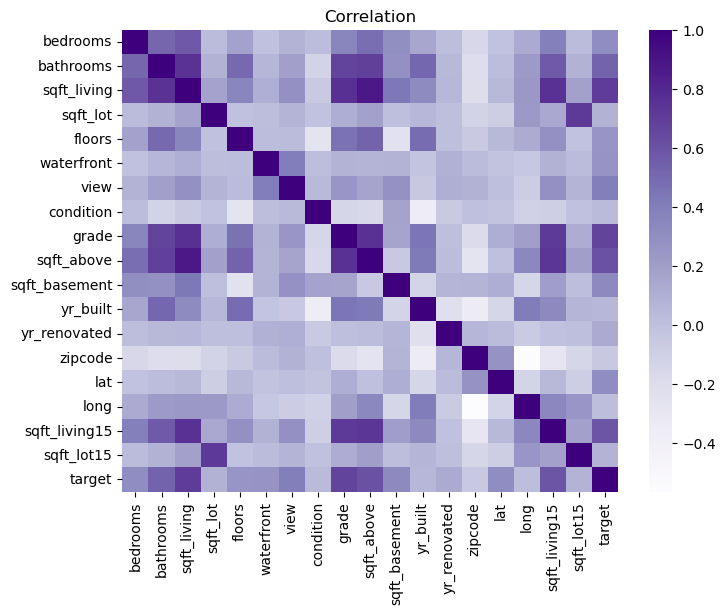

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = h_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [9]:
corr['target'].sort_values(ascending=False)[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: target, dtype: float64

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

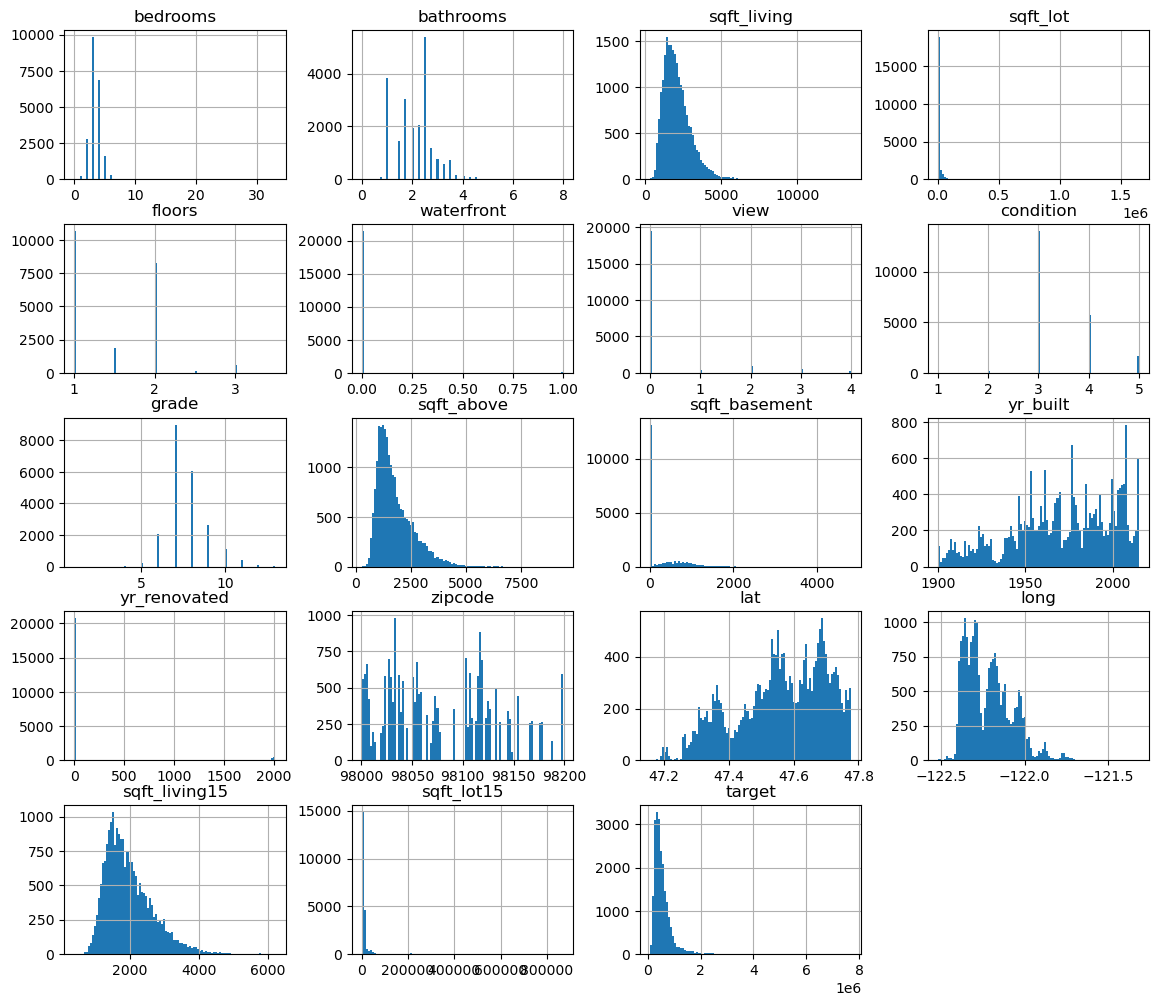

In [10]:
h_df.hist(figsize=(14, 12), bins=100)

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [13]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 36867855391.4833, RMSE: 192010.0398, R2: 0.7077


- id와 date만 제거 한 후 R2: 0.7077

### 2
- 타겟 피쳐 로그변환

<Axes: >

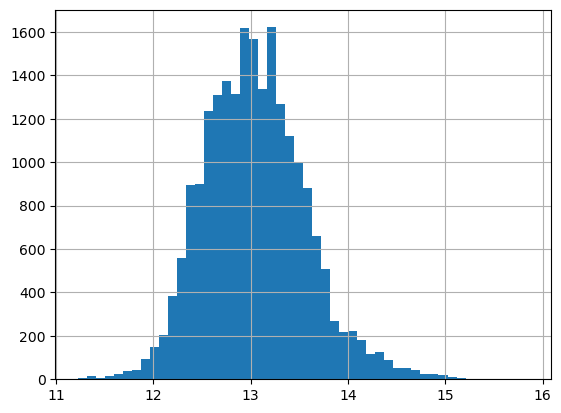

In [14]:
import numpy as np

np.log1p(h_df.target).hist(bins=50)

In [15]:
h_df.target = np.log1p(h_df.target)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

- test_size가 0.3일때 R2가 가장 높다.

In [17]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0612, RMSE: 0.2473, R2: 0.7800


In [18]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.4, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

- degree=2, test_size=0.4 일때 가장 R2가 높다

In [19]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0476, RMSE: 0.2181, R2: 0.8305


MSE: 0.0473, RMSE: 0.2175, R2: 0.8281


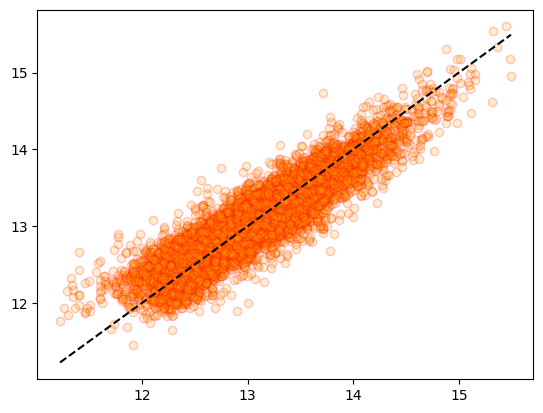

In [20]:
import matplotlib.pyplot as plt

l_r = LinearRegression()

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.0476, RMSE: 0.2181, R2: 0.8305


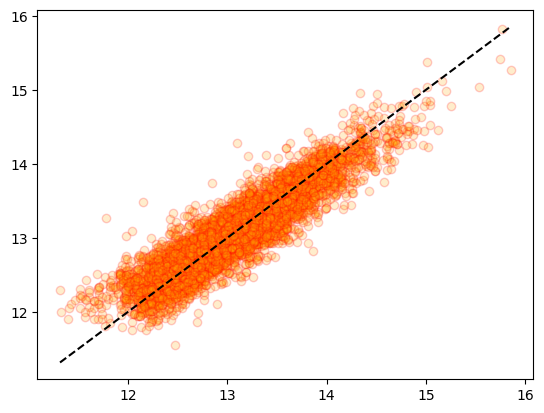

In [21]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

- train과 test의 결과 분포가 비슷한 것을 보아 과적합은 아니라 생각된다.
- 하지만 별다른 조정없이 점수가 높게나오는게 미심쩍어 vif 확인

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [23]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,2.327239e+01,bedrooms
1,2.861188e+01,bathrooms
2,inf,sqft_living
3,2.377656e+00,sqft_lot
4,1.689222e+01,floors
5,1.212827e+00,waterfront
6,1.551834e+00,view
7,3.471167e+01,condition
8,1.473809e+02,grade
9,inf,sqft_above


- infinity가 나올정도로 vif가 높아 상관관계 확인 후 컬럼 제거

In [24]:
corr['target'].sort_values(ascending=False)[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: target, dtype: float64

In [25]:
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,target
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.308350
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.525138
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.702035
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.089661
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.256794
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.266369
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.397293
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.036362
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.667434
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050,0.605567


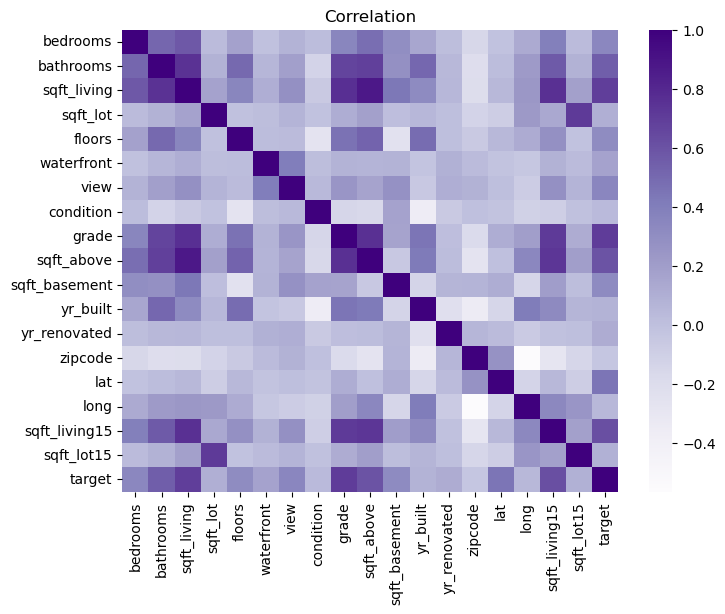

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = h_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [27]:
corr['target'].sort_values(ascending=False)[1:]

grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601802
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
yr_renovated     0.114498
sqft_lot         0.099622
sqft_lot15       0.091592
yr_built         0.080654
long             0.049942
condition        0.039558
zipcode         -0.038306
Name: target, dtype: float64

- sqft_living, sqft_above와 sqft_basement가 inf
- 우선 sqft_living과 sqft_above가 서로 상관관계가 높아서(0.87) 타겟피쳐와 관계가 더 낮은 sqft_above 제거

In [28]:
h_df = h_df.drop(labels=['sqft_above'], axis=1)
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,target
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309987
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195616
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100718
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311331
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793862
21609,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899222
21610,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904461
21611,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899222


In [29]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.4, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [30]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0475, RMSE: 0.2180, R2: 0.8306


In [31]:
get_vif(features)

,vif_score,feature
0,2.327239e+01,bedrooms
1,2.861188e+01,bathrooms
2,3.701949e+01,sqft_living
3,2.377656e+00,sqft_lot
4,1.689222e+01,floors
5,1.212827e+00,waterfront
6,1.551834e+00,view
7,3.471167e+01,condition
8,1.473809e+02,grade
9,2.793485e+00,sqft_basement


- 여전히 vif가 높지만 sqft_above를 제거하기 전보단 훨씬 나은 듯 하다.
- 다음으로 높은 zipcode와 long 확인

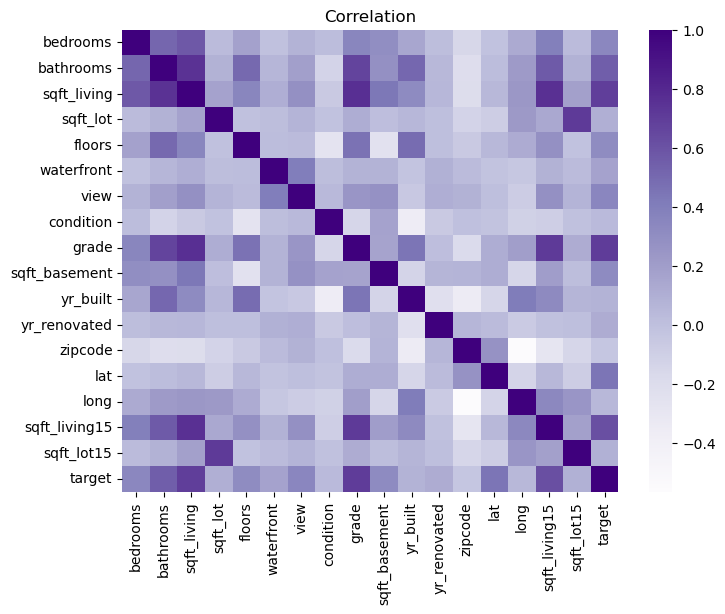

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = h_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

- zipcode 는 다른 피쳐와의 관계가 거의 없고, long과 lat 또한 별로 높지 않다
- 다른 컬럼과 관계가 많은 피쳐인 sqft_living과 grade 확인

In [33]:
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,target
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.343561
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.550802
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.695341
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.099622
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.310558
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.174586
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.346522
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.039558
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.703634
sqft_basement,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276,0.316970


- sqft_living과 grade가 서로 관계가 커서 터겟과의 관계가 더 적은 피쳐를 제거하려 하였으나 둘 다 타겟과의 관계가 높아서
- sqft_living과 상관관계가 높은 sqft_living15 피쳐를 보았으나 sqft_living15또한 타겟과의 관계가 세번째로 높다
- 따라서 일단 타겟과의 관계가 0.3보다 낮은 피쳐들을 다 제거한 후 다시 진행

In [34]:
corr['target'].sort_values(ascending=False)[1:]

grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
yr_renovated     0.114498
sqft_lot         0.099622
sqft_lot15       0.091592
yr_built         0.080654
long             0.049942
condition        0.039558
zipcode         -0.038306
Name: target, dtype: float64

In [35]:
h_df = h_df.drop(labels=['waterfront', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'long', 'condition', 'zipcode'], axis=1)
h_df

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_basement,lat,sqft_living15,target
0,3,1.00,1180,1.0,0,7,0,47.5112,1340,12.309987
1,3,2.25,2570,2.0,0,7,400,47.7210,1690,13.195616
2,2,1.00,770,1.0,0,6,0,47.7379,2720,12.100718
3,4,3.00,1960,1.0,0,7,910,47.5208,1360,13.311331
4,3,2.00,1680,1.0,0,8,0,47.6168,1800,13.142168
...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,8,0,47.6993,1530,12.793862
21609,4,2.50,2310,2.0,0,8,0,47.5107,1830,12.899222
21610,2,0.75,1020,2.0,0,7,0,47.5944,1020,12.904461
21611,3,2.50,1600,2.0,0,8,0,47.5345,1410,12.899222


In [36]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.4, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [37]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0669, RMSE: 0.2587, R2: 0.7615


- vif스코어 다시 확인

In [38]:
get_vif(features)

,vif_score,feature
0,22.819014,bedrooms
1,24.968924,bathrooms
2,34.702393,sqft_living
3,15.834443,floors
4,1.278659,view
5,137.001542,grade
6,2.598594,sqft_basement
7,82.365905,lat
8,26.128389,sqft_living15


- 타겟피쳐와 관계가 낮은 피쳐들을 제거하니 훨씬 양호해진 모습이다.

In [39]:
corr = h_df.corr()
corr

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_basement,lat,sqft_living15,target
bedrooms,1.000000,0.515884,0.576671,0.175429,0.079532,0.356967,0.303093,-0.008931,0.391638,0.343561
bathrooms,0.515884,1.000000,0.754665,0.500653,0.187737,0.664983,0.283770,0.024573,0.568634,0.550802
sqft_living,0.576671,0.754665,1.000000,0.353949,0.284611,0.762704,0.435043,0.052529,0.756420,0.695341
floors,0.175429,0.500653,0.353949,1.000000,0.029444,0.458183,-0.245705,0.049614,0.279885,0.310558
view,0.079532,0.187737,0.284611,0.029444,1.000000,0.251321,0.276947,0.006157,0.280439,0.346522
grade,0.356967,0.664983,0.762704,0.458183,0.251321,1.000000,0.168392,0.114084,0.713202,0.703634
sqft_basement,0.303093,0.283770,0.435043,-0.245705,0.276947,0.168392,1.000000,0.110538,0.200355,0.316970
lat,-0.008931,0.024573,0.052529,0.049614,0.006157,0.114084,0.110538,1.000000,0.048858,0.449174
sqft_living15,0.391638,0.568634,0.756420,0.279885,0.280439,0.713202,0.200355,0.048858,1.000000,0.619312
target,0.343561,0.550802,0.695341,0.310558,0.346522,0.703634,0.316970,0.449174,0.619312,1.000000


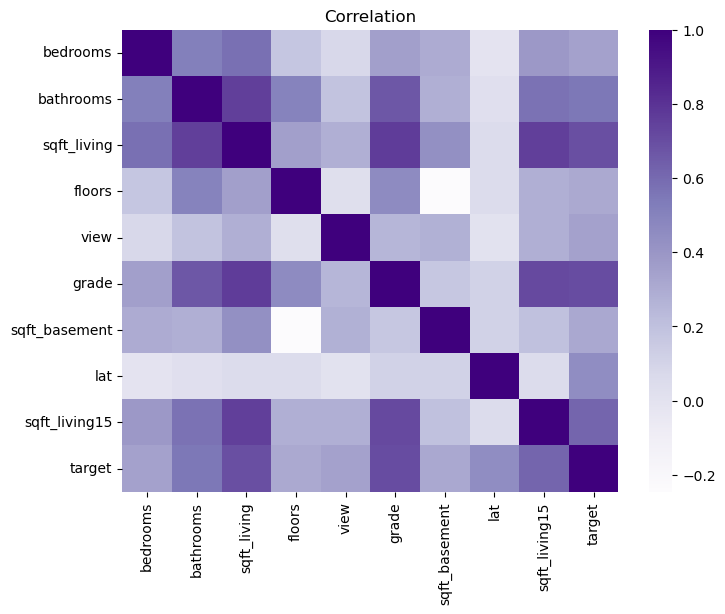

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
corr = h_df.corr()
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [41]:
corr['target'].sort_values(ascending=False)[1:]

grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
Name: target, dtype: float64

- 상관관계도 나쁘지않다고 판단

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0862, RMSE: 0.2937, R2: 0.6821
RandomForestRegressor
MSE: 0.0437, RMSE: 0.2090, R2: 0.8390
GradientBoostingRegressor
MSE: 0.0424, RMSE: 0.2059, R2: 0.8437
XGBRegressor
MSE: 0.0439, RMSE: 0.2096, R2: 0.8381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 9
[LightGBM] [Info] Start training from score 13.048519
LGBMRegressor
MSE: 0.0399, RMSE: 0.1997, R2: 0.8529


- 부스팅까지 사용한 결과 가장 높은 수치는 lgb의 R2가 0.8529로 가장 높았다

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

### **차원 축소(PCA)**

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca_features = pd.DataFrame(pca.fit_transform(h_df.iloc[:, :-1]))
pca_h_df = pd.concat([pca_features, h_df.iloc[:, -1]], axis=1).reset_index(drop=True)
pca_h_df

,0,1,2,target
0,-1141.595967,-46.466344,86.187451,12.309987
1,257.649160,380.815352,358.480025,13.195616
2,-721.290599,-983.090282,-923.059128,12.100718
3,-331.615292,819.341872,-90.474730,13.311331
4,-480.809340,-204.407895,82.090186,13.142168
...,...,...,...,...
21608,-751.320628,-76.938503,159.387628,12.793862
21609,50.848844,-69.958178,393.640964,12.899222
21610,-1447.663914,108.916159,187.077004,12.904461
21611,-759.778621,12.829990,265.075816,12.899222


In [45]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.79554682 0.13501708 0.06943475]
0.9999986466967925


#### PCA사용 후 Tree, ensemble, boosting

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pca_h_df.iloc[:, :-1], pca_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('\n', model.__class__.__name__)
    get_evaluation(y_test, prediction)


 DecisionTreeRegressor
MSE: 0.2522, RMSE: 0.5022, MSLE: 0.0013, RMSLE: 0.0358, R2: 0.0701

 RandomForestRegressor
MSE: 0.1420, RMSE: 0.3768, MSLE: 0.0007, RMSLE: 0.0269, R2: 0.4765

 GradientBoostingRegressor
MSE: 0.1287, RMSE: 0.3588, MSLE: 0.0007, RMSLE: 0.0256, R2: 0.5254

 XGBRegressor
MSE: 0.1371, RMSE: 0.3702, MSLE: 0.0007, RMSLE: 0.0264, R2: 0.4946
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519

 LGBMRegressor
MSE: 0.1281, RMSE: 0.3579, MSLE: 0.0007, RMSLE: 0.0255, R2: 0.5277


#### LinearRegression

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

l_r_pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('l_r', l_r)])
l_r_pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('l_r', LinearRegression())])

In [48]:
l_r_pipe_prediction = l_r_pipe.predict(X_test)
get_evaluation(y_test, l_r_pipe_prediction)

MSE: 0.0759, RMSE: 0.2756, MSLE: 0.0004, RMSLE: 0.0195, R2: 0.7201


#### lgb

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor(n_estimators=100)

lgb_r_pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('lgb_r', lgb_r)])
lgb_r_pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519


Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('lgb_r', LGBMRegressor())])

In [50]:
lgb_r_pipe_prediction = lgb_r_pipe.predict(X_test)
get_evaluation(y_test, lgb_r_pipe_prediction)

MSE: 0.0540, RMSE: 0.2325, MSLE: 0.0003, RMSLE: 0.0165, R2: 0.8008


#### gbr

In [51]:
features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

gb_r = GradientBoostingRegressor(random_state=124)

gb_r_pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('gb_r', gb_r)])
gb_r_pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('gb_r', GradientBoostingRegressor(random_state=124))])

In [52]:
gb_r_pipe_prediction = gb_r_pipe.predict(X_test)
get_evaluation(y_test, gb_r_pipe_prediction)

MSE: 0.0563, RMSE: 0.2374, MSLE: 0.0003, RMSLE: 0.0168, R2: 0.7923


#### 가장 잘나온 lgbr으로 교차검증

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor(n_estimators=100)

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('lgb_r', lgb_r)])
pipe.fit(X_train, y_train)

# cross_val_score로 교차검증(cross_val_score이 알아서 데이터를 분리하여서 교차검증을 해준다)
score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start training from score 13.049089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start trainin

#### VotingRegressor

In [54]:
from sklearn.ensemble import VotingRegressor

lgb_r = LGBMRegressor(n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
l_r = LinearRegression()

v_r = VotingRegressor([('lgb_r', lgb_r), ('gb_r', gb_r), ('l_r', l_r)])

v_r_pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('v_r', v_r)])
v_r_pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519


Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=3)),
                ('v_r',
                 VotingRegressor(estimators=[('lgb_r', LGBMRegressor()),
                                             ('gb_r',
                                              GradientBoostingRegressor(random_state=124)),
                                             ('l_r', LinearRegression())]))])

In [55]:
v_r_pipe_prediction = v_r_pipe.predict(X_test)
get_evaluation(y_test, v_r_pipe_prediction)

MSE: 0.0565, RMSE: 0.2377, MSLE: 0.0003, RMSLE: 0.0168, R2: 0.7917


In [56]:
lgb_r = LGBMRegressor(n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
l_r = LinearRegression()

v_r = VotingRegressor([('lgb_r', lgb_r), ('gb_r', gb_r), ('l_r', l_r)])

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('v_r', v_r)])
pipe.fit(X_train, y_train)

score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start training from score 13.049089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start trainin

Model			MSE		MSLE		R2
l_r_pipe		0.0759		0.0004		0.7201
gb_r_pipe		0.0563		0.0003		0.7923
lgb_r_pipe		0.0540		0.0003		0.8008
v_r_pipe		0.0565		0.0003		0.7917


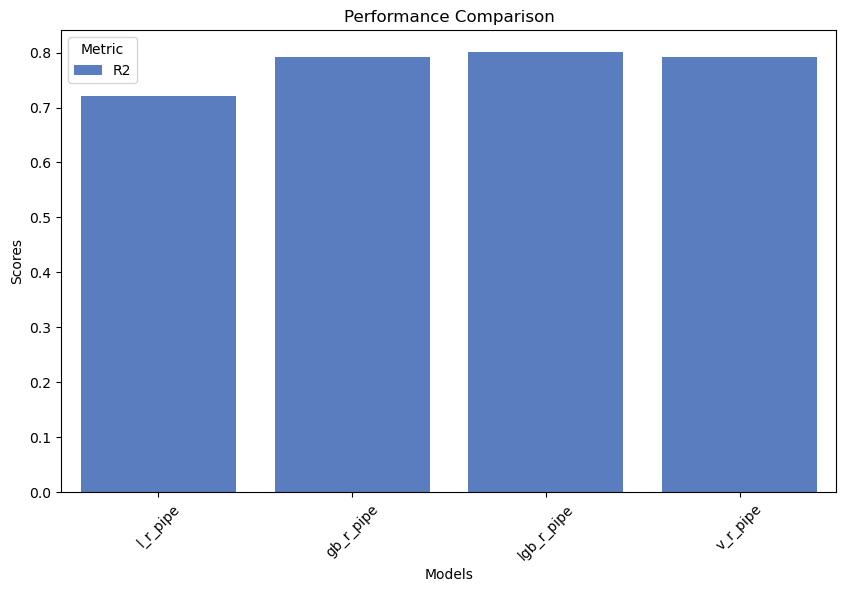

In [57]:
model_names = ['l_r_pipe', 'gb_r_pipe', 'lgb_r_pipe', 'v_r_pipe']

MSE = [mean_squared_error(y_test, l_r_pipe_prediction), mean_squared_error(y_test, gb_r_pipe_prediction),
              mean_squared_error(y_test, lgb_r_pipe_prediction), mean_squared_error(y_test, v_r_pipe_prediction)]

MSLE = [mean_squared_log_error(y_test, l_r_pipe_prediction), mean_squared_log_error(y_test, gb_r_pipe_prediction),
           mean_squared_log_error(y_test, lgb_r_pipe_prediction), mean_squared_log_error(y_test, v_r_pipe_prediction)]

R2 = [r2_score(y_test, l_r_pipe_prediction), r2_score(y_test, gb_r_pipe_prediction),
             r2_score(y_test, lgb_r_pipe_prediction), r2_score(y_test, v_r_pipe_prediction)]

# 성능 지표 출력
print("Model\t\t\tMSE\t\tMSLE\t\tR2")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{MSE[i]:.4f}\t\t{MSLE[i]:.4f}\t\t{R2[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names,
    # 'MSE': MSE,
    # 'MSLE': MSLE,
    'R2': R2
})

# 시각화
plt.figure(figsize=(10, 6))
data_melted = data.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='muted')
plt.title('Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=124)

lgb_r = LGBMRegressor(n_estimators=100)

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=3)), ('lgb_r', lgb_r)])

# cross_val_score로 교차검증(cross_val_score이 알아서 데이터를 분리하여서 교차검증을 해준다)
score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
print('r2:', np.round(np.mean(score), 5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start training from score 13.049089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start training from score 13.048217
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start trainin

In [64]:
pipe.fit(X_train, y_train)

lgb_r_pipe_prediction = pipe.predict(X_train)
get_evaluation(y_train, lgb_r_pipe_prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519
MSE: 0.0498, RMSE: 0.2232, MSLE: 0.0002, RMSLE: 0.0158, R2: 0.8213


In [59]:
pipe.fit(X_train, y_train)

lgb_r_pipe_prediction = pipe.predict(X_test)
get_evaluation(y_test, lgb_r_pipe_prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 3
[LightGBM] [Info] Start training from score 13.048519
MSE: 0.0540, RMSE: 0.2325, MSLE: 0.0003, RMSLE: 0.0165, R2: 0.8008


In [60]:
pipe.fit(X_train_val, y_train_val)

lgb_r_val_pipe_prediction = pipe.predict(X_test_val)
get_evaluation(y_test_val, lgb_r_val_pipe_prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 3
[LightGBM] [Info] Start training from score 13.046496
MSE: 0.0600, RMSE: 0.2450, MSLE: 0.0003, RMSLE: 0.0173, R2: 0.7843


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 9
[LightGBM] [Info] Start training from score 13.048519
MSE: 0.0349, RMSE: 0.1868, MSLE: 0.0002, RMSLE: 0.0133, R2: 0.8750


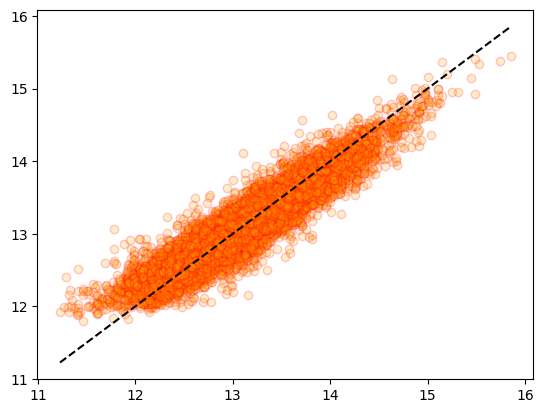

In [61]:
import matplotlib.pyplot as plt

lgb_r = LGBMRegressor(n_estimators=100)

lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 9
[LightGBM] [Info] Start training from score 13.048519
MSE: 0.0399, RMSE: 0.1997, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8529


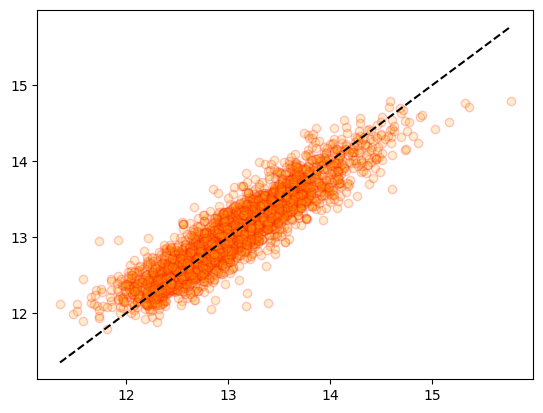

In [62]:
lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

Model			MSE		MSLE		R2
lgb_r_pipe		0.0540		0.0003		0.8008
lgb_r_val_pipe		0.0600		0.0003		0.7843


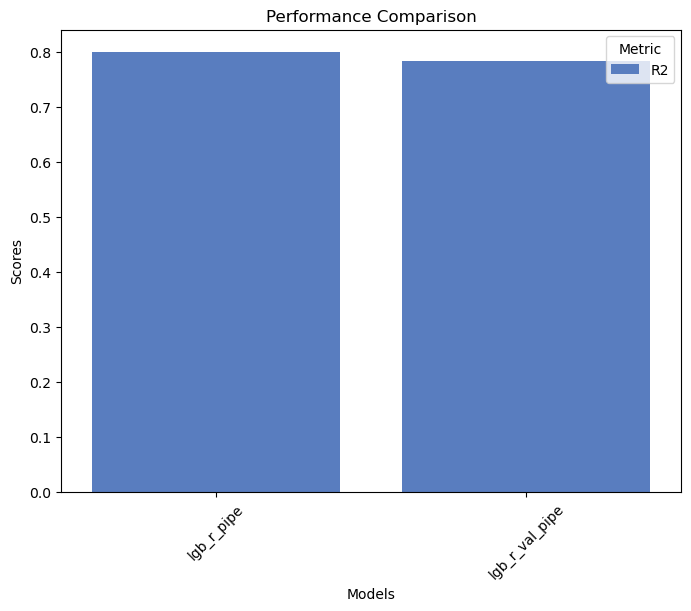

In [63]:
# 모델 명
model_names = ['lgb_r_pipe', 'lgb_r_val_pipe']

# MSE
MSE = [mean_squared_error(y_test, lgb_r_pipe_prediction), mean_squared_error(y_test_val, lgb_r_val_pipe_prediction)]
# MSLE
MSLE = [mean_squared_log_error(y_test, lgb_r_pipe_prediction), mean_squared_log_error(y_test_val, lgb_r_val_pipe_prediction)]
# R2
R2 = [r2_score(y_test, lgb_r_pipe_prediction), r2_score(y_test_val, lgb_r_val_pipe_prediction)]

# 성능 지표 출력
print("Model\t\t\tMSE\t\tMSLE\t\tR2")
for i in range(len(model_names)):
    print(f"{model_names[i]}\t\t{MSE[i]:.4f}\t\t{MSLE[i]:.4f}\t\t{R2[i]:.4f}")

# 데이터프레임 생성
import pandas as pd
data = pd.DataFrame({
    'Model': model_names,
    # 'MSE': MSE,
    # 'MSLE': MSLE,
    'R2': R2
})

# 시각화
# 사이즈
plt.figure(figsize=(8, 6))
# melt를 통해 데이터를 넓게 변환
data_melted = data.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='muted')
# 제목
plt.title('Performance Comparison')
# x축
plt.xlabel('Models')
# y축
plt.ylabel('Scores')
# x축 기울기
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

### 결론
- PCA를 사용한 차원축소, 스탠다드 스케일링 후 LGBM모델을 통해 나온 결과가 좋아서 같은 방식으로 교차검증 하여 나온  
  R2 스코어가 각각 0.80, 0.78으로 거의 비슷하여 LGBM 모델이 적합하다고 판단됩니다.
- linear regression과 gradientBoosting, LightGradientBoosting 모델을 사용한 VotingRegressor를 통해 나온  
R2스코어와 교차검증 후 R2스코어 또한 0.78, 0.77로 만족스러운 결과를 내었습니다.
- 결과가 좋았던 LGBM을 검증데이터로 비교해본 결과  
  원본데이터에서의 R2 0.8008, 검증데이터 0.7843으로 검증 결과또한 cross_val_score와 비슷한 결과가 나왔습니다.
- LGBM 모델의 원본데이터 결과와 검증데이터의 결과와 train데이터와 test데이터를 사용한 시각화를 통해 과적합또한 발생하지 않았다고 판단이 됩니다.